# Определение перспективного тарифа для телеком-компании

<b>Описание проекта</b>
<br>
<br>
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 
<br>
<br>
<b>Цель проекта: </b>проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
<br>

<br>
<b>Примечание: </b>
<br>

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Изучение данных из файлов

In [1]:
#подключим необходимые для работы библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import warnings
warnings.simplefilter("ignore")
from scipy import stats as st
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
#прочитаем исходные датафреймы

try:
    calls = pd.read_csv('C:/Users//datasets/calls.csv', sep=',') 
    internet = pd.read_csv('C:/Users//datasets/internet.csv', sep=',')
    messages = pd.read_csv('C:/Users//datasets/messages.csv', sep=',')
    tariffs = pd.read_csv('C:/Users//datasets/tariffs.csv', sep=',')
    users = pd.read_csv('C:/Users//datasets/users.csv', sep=',')
except:
    calls = pd.read_csv('/datasets/calls.csv', sep=',')
    internet = pd.read_csv('/datasets/internet.csv', sep=',')
    messages = pd.read_csv('/datasets/messages.csv', sep=',')
    tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')
    users = pd.read_csv('/datasets/users.csv', sep=',')

In [3]:
#изучим основную информацию об исходных датафреймах

dataframes = [calls, internet, messages, tariffs, users]
names = ['calls', 'internet', 'messages', 'tariffs', 'users']

count = -1
for name in names:
    count += 1
    display(name)
    print('Первые 2 строки датафрейма:')
    display(dataframes[count].head(2))
    print('Основная информация о датафрейме:')
    display(dataframes[count].info())
    print('Доля пропущенных данных в датафрейме:')
    display(dataframes[count].isna().mean())
    print('Количество дубликатов: ')
    display(dataframes[count].duplicated().sum())

'calls'

Первые 2 строки датафрейма:


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000


Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

Доля пропущенных данных в датафрейме:


id          0.00
call_date   0.00
duration    0.00
user_id     0.00
dtype: float64

Количество дубликатов: 


0

'internet'

Первые 2 строки датафрейма:


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000


Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

Доля пропущенных данных в датафрейме:


Unnamed: 0     0.00
id             0.00
mb_used        0.00
session_date   0.00
user_id        0.00
dtype: float64

Количество дубликатов: 


0

'messages'

Первые 2 строки датафрейма:


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000


Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

Доля пропущенных данных в датафрейме:


id             0.00
message_date   0.00
user_id        0.00
dtype: float64

Количество дубликатов: 


0

'tariffs'

Первые 2 строки датафрейма:


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

Доля пропущенных данных в датафрейме:


messages_included       0.00
mb_per_month_included   0.00
minutes_included        0.00
rub_monthly_fee         0.00
rub_per_gb              0.00
rub_per_message         0.00
rub_per_minute          0.00
tariff_name             0.00
dtype: float64

Количество дубликатов: 


0

'users'

Первые 2 строки датафрейма:


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart


Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

Доля пропущенных данных в датафрейме:


user_id      0.00
age          0.00
churn_date   0.92
city         0.00
first_name   0.00
last_name    0.00
reg_date     0.00
tariff       0.00
dtype: float64

Количество дубликатов: 


0

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Изучив данные исходных датафреймов, можно заметить, что практически во всех датафреймах полный набор данных, пропуски имеются только в датафрейме 'users' по столбцу 'churn_date', но это связано с тем, что абоненты еще пользуются услугами мобильного оператора, так что пропуски в данном столбце вполне уместны и не случайны. Также в каждом из датафреймов можно заметить, что столбцу с датой присвоен неверный тип данных. Надо исправить данную ситуацию)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Добавил проверку дубликатов, я ее делал, не стал оставлять в итоговом анализе. Столбец " Unnamed: 0" в датасете интернет-трафика тоже видел, он дублирует индексы, не стал его убирать, т.к. в явном виде с данным датафреймом не работаю.
</div>

## Подготовка данных

### Замена типа данных

In [4]:
#заменим тип данных по столбцам с датами в каждом датафрейме

for dataframe in dataframes:
    for i in ['call_date', 'session_date', 'message_date', 'churn_date', 'reg_date']:
        if i in dataframe.columns:
            dataframe[i] = pd.to_datetime(dataframe[i], format='%Y-%m-%d')

In [5]:
#выделим значение месяца в необходимых датафреймах

for dataframe in dataframes:
    for i in ['call_date', 'session_date', 'message_date']:
        if i in dataframe.columns:
            dataframe['month'] =  pd.DatetimeIndex(dataframe[i]).month

In [6]:
#проверим внесенные изменения
dataframes = [calls, internet, messages, tariffs, users]
names = ['calls', 'internet', 'messages', 'tariffs', 'users']

count = -1
for name in names:
    count += 1
    display(name)
    display(dataframes[count].info())

'calls'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


None

'internet'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.8+ MB


None

'messages'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


None

'tariffs'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

'users'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Теперь столбцы с датами имеют верный тип данных.
</div>

### Подсчет количества сделанных звонков и израсходованных минут разговора по месяцам

In [7]:
#изучим датафрейм со сделанными звонками

calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
5,1000_5,2018-11-02,0.00,1000,11
6,1000_6,2018-10-18,0.00,1000,10
7,1000_7,2018-08-22,18.31,1000,8
8,1000_8,2018-09-15,18.44,1000,9
9,1000_9,2018-08-15,0.00,1000,8


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Прежде чем приступать к подсчету количества звонков и израсходованных минут разговора необходимо учесть информацию, указанную в примечании и округлить значение длительности звонка до целой минуты.
Примечание:
«Мегалайн» всегда округляет секунды до минут. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
</div>

In [8]:
#округлим значение длительности звонков до целой минуты

calls['duration'] = calls['duration'].apply(lambda x: ceil(x))

In [9]:
#проверим внесенные изменения

calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


In [10]:
# построим сводную таблицу для каждого пользователя для подсчета количества сделанных звонков и израсходованных минут разговора
# по месяцам

calls_month = calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=['count', 'sum'])

calls_month.columns = ['count_calls', 'duration_calls']

### Подсчет количества отправленных сообщений по месяцам

In [11]:
# построим сводную таблицу для подсчета отправленных сообщений по месяцам

messages_month = messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count')

messages_month.columns = ['count_messages']

### Подсчет объема израсходованного интернет-трафика по месяцам
    

In [12]:
# построим сводную таблицу для подсчета израсходованного интернет-трафика по месяцам

internet_month = internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Учтем информацию, указанную в примечании и округлим значение мегабайт до целого гигабайта.
<br>
Примечание:
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
</div>

In [13]:
#переведем значения из МБ в ГБ и округлим значение до целого ГБ

internet_month['gb_used'] = (internet_month['mb_used']/1024).apply(lambda x: ceil(x))

internet_month = internet_month[['gb_used']]

### Подсчет помесячной выручки с каждого пользователя

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Для подсчета помесячной выручки с каждого пользователя нам необходимо объединить несколько таблиц: 'calls_month', 'messages_month', 'internet_month'. 
</div>

In [14]:
#объединим таблицы с совершенными звонками, отправленными сообщениями и израсходованным трафиком в одну таблицу
#объединяем методом merge, тип слияния применяем 'outer', т.к. может быть так, что абонент не совершал звонков, либо 
#не отправлял сообщений, но при этом пользовался интернетом

all_options_month = calls_month.merge(messages_month, on=['user_id','month'], how='outer').merge(internet_month, on=['user_id','month'], how='outer')

In [15]:
# замением пропущенные значения на ноль

all_options_month = all_options_month.fillna(value=0)

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Данные пропуски пояивились в результате объединения таблиц методом "все со всеми", т.к. могли бытьп пользователи, которые не звонили, но отправляли сообщения, либо тратили мегабайты)
</div>

In [16]:
# добавим в таблицу с тарифами значение допустимого интернет-трафика в ГБ в месяц

tariffs['gb_per_month_included'] = (tariffs['mb_per_month_included']/1024).apply(lambda x: ceil(x))

In [17]:
#добавим данные о пользователях и тарифах в нашу таблицу

all_options_month = all_options_month.reset_index()

In [18]:
#проверим количество пользователей при объединении методом 'outer'

all_options_month_5555 = all_options_month.merge(users[['user_id', 'city', 'tariff']], on='user_id', how='outer').merge(tariffs, left_on='tariff', right_on='tariff_name', how='left')

all_options_month_5555.tail()

,user_id,month,count_calls,duration_calls,count_messages,gb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
3211,1489,10.00,0.00,0.00,21.00,20.00,Санкт-Петербург,smart,50,15360,500,550,200,3,3,smart,15
3212,1489,11.00,0.00,0.00,20.00,18.00,Санкт-Петербург,smart,50,15360,500,550,200,3,3,smart,15
3213,1489,12.00,0.00,0.00,35.00,17.00,Санкт-Петербург,smart,50,15360,500,550,200,3,3,smart,15
3214,1128,nan,nan,nan,nan,nan,Волжский,ultra,1000,30720,3000,1950,150,1,1,ultra,30
3215,1371,nan,nan,nan,nan,nan,Омск,smart,50,15360,500,550,200,3,3,smart,15


In [19]:
all_options_month = all_options_month.merge(users[['user_id', 'city', 'tariff']], on='user_id', how='left').merge(tariffs, left_on='tariff', right_on='tariff_name', how='left')

all_options_month.head()

,user_id,month,count_calls,duration_calls,count_messages,gb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,1000,5,22.00,159.00,22.00,3.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,30
1,1000,6,43.00,172.00,60.00,23.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,30
2,1000,7,47.00,340.00,75.00,14.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,30
3,1000,8,52.00,408.00,81.00,14.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,30
4,1000,9,58.00,466.00,57.00,15.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,30


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Ушли пользователи из-за того, что не совершали звонки, не писали смс-сообщения и не тратили интернет-трафик. То есть я присоединял к таблице 'all_options_month' таблицу 'users', включая только тех пользователей, которые пользовались услугами оператора за 2018 год.  Не стал данную процедуру оставлять в конечной работе, т.к. посчитал промежуточным шагом.
<br>
<br>    
Добавил проверку на 3 ячейки выше (датафрейм 'all_options_month_5555'), также ниже данного комментария имеется проверка размера датафрейма 'all_options_month_5555'
</div>

In [20]:
# Комментарий ревьюера
all_options_month.user_id.unique().shape 

(498,)

In [21]:
# Проверка пользователей датафрейма 'all_options_month_5555'
all_options_month_5555.user_id.unique().shape 

(500,)

In [22]:
#напишем функцию для подсчета выручки с каждого абонента в месяц

def revenue(row):
             
    calls_over_lim = np.where(row.duration_calls > row.minutes_included, row.duration_calls-row.minutes_included, 0)*row.rub_per_minute
    
    messages_over_lim = np.where(row.count_messages > row.messages_included, row.count_messages-row.messages_included, 0)*row.rub_per_message
    
    gb_used_over_lim = np.where(row.gb_used > row.gb_per_month_included, row.gb_used-row.gb_per_month_included, 0)*row.rub_per_gb
    
    return row.rub_monthly_fee + calls_over_lim + messages_over_lim + gb_used_over_lim
    
all_options_month['revenue'] = all_options_month.apply(revenue, axis=1)

In [23]:
#оставим в нашей таблице только те данные, котоорые будут необходимы в дальнейшем

all_options_month = all_options_month[['user_id', 'month', 'city', 'tariff', 'revenue', 'duration_calls', 'count_messages', 'gb_used']]

all_options_month

,user_id,month,city,tariff,revenue,duration_calls,count_messages,gb_used
0,1000,5,Краснодар,ultra,"1,950.00",159.00,22.00,3.00
1,1000,6,Краснодар,ultra,"1,950.00",172.00,60.00,23.00
2,1000,7,Краснодар,ultra,"1,950.00",340.00,75.00,14.00
3,1000,8,Краснодар,ultra,"1,950.00",408.00,81.00,14.00
4,1000,9,Краснодар,ultra,"1,950.00",466.00,57.00,15.00
...,...,...,...,...,...,...,...,...
3209,1489,9,Санкт-Петербург,smart,950.00,0.00,32.00,17.00
3210,1489,10,Санкт-Петербург,smart,"1,550.00",0.00,21.00,20.00
3211,1489,11,Санкт-Петербург,smart,"1,150.00",0.00,20.00,18.00
3212,1489,12,Санкт-Петербург,smart,950.00,0.00,35.00,17.00


## Анализ данных

### Описание поведения пользователей

In [24]:
#построим сводную таблицу для определения основных статистических параметров по месяцам

client_tariff = all_options_month.pivot_table(index=['tariff', 'month'], values=['duration_calls', 'count_messages', 'gb_used'], aggfunc={'duration_calls':['mean', 'var', 'std'], 'count_messages':['mean', 'var', 'std'], 'gb_used':['mean', 'var', 'std']})

client_tariff

count_messages                duration_calls                    \
                       mean   std      var           mean    std        var   
tariff month                                                                  
smart  1              18.24 16.20   262.37         203.85 154.23  23,787.34   
       2              24.09 21.75   473.10         298.69 190.82  36,412.29   
       3              31.86 26.80   718.49         390.05 191.89  36,823.16   
       4              30.74 24.54   602.14         367.13 186.49  34,778.21   
       5              33.77 27.04   730.99         387.36 186.60  34,820.06   
       6              33.40 28.40   806.81         395.64 175.34  30,742.92   
       7              33.75 28.28   799.89         408.35 179.58  32,250.27   
       8              33.64 28.95   838.26         421.47 186.53  34,793.58   
       9              33.64 28.12   790.62         428.61 183.13  33,535.34   
       10             33.77 28.57   816.11         426.14 188.13  35,392.34   
       11             34.08 28.39   805.94         435.27 177.78  31,605.24   
       12             35.99 30.58   934.95         478.56 199.25  39,698.62   
ultra  1              33.78 30.67   940.69         428.11 269.76  72,769.36   
       2              21.96 26.77   716.82         297.12 296.51  87,919.68   
       3              32.30 41.62 1,732.38         489.65 333.74 111,384.90   
       4              31.56 37.51 1,407.29         458.02 267.68  71,653.87   
       5              37.85 40.31 1,624.64         510.33 289.60  83,870.19   
       6              41.73 44.57 1,986.30         479.70 302.55  91,535.95   
       7              49.85 48.70 2,372.04         545.79 307.12  94,322.28   
       8              48.44 46.60 2,171.74         510.78 312.98  97,956.50   
       9              52.29 46.40 2,152.86         539.44 325.14 105,716.78   
       10             58.43 51.93 2,697.18         558.08 326.29 106,464.58   
       11             55.79 49.77 2,476.95         541.38 310.76  96,570.06   
       12             60.61 51.79 2,681.98         592.81 342.46 117,276.33   

             gb_used               
                mean   std    var  
tariff month                       
smart  1        8.74  6.28  39.41  
       2       11.84  6.10  37.15  
       3       15.23  5.71  32.55  
       4       13.62  5.59  31.30  
       5       15.91  5.86  34.37  
       6       15.95  5.65  31.91  
       7       15.88  5.78  33.42  
       8       16.74  5.48  30.04  
       9       16.39  5.09  25.88  
       10      16.88  5.74  32.90  
       11      17.00  5.21  27.18  
       12      18.20  5.46  29.79  
ultra  1       13.22  6.67  44.44  
       2       12.00 10.45 109.13  
       3       17.65 10.69 114.35  
       4       16.96  9.46  89.44  
       5       19.37  9.78  95.63  
       6       18.94  9.08  82.39  
       7       20.51  9.82  96.43  
       8       19.60 10.25 105.15  
       9       19.24  9.29  86.26  
       10      20.07  9.55  91.26  
       11      19.81  9.68  93.80  
       12      21.74 10.16 103.24

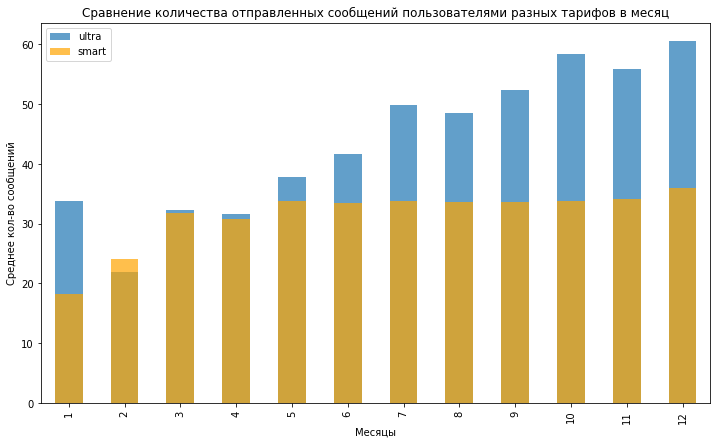

In [25]:
#заберем из сводной таблицы информацию о среднем количестве отправленных сообщений в месяц по разным тарифам и построим гистрограмму

mess_smart = client_tariff.xs('count_messages', level=0, axis=1)['mean'].xs('smart', level=0)
mess_ultra = client_tariff.xs('count_messages', level=0, axis=1)['mean'].xs('ultra', level=0)

mess_ultra.plot(kind='bar', alpha=0.7, label='ultra')
mess_smart.plot(kind='bar', alpha=0.7, label='smart', figsize=(12,7), color='orange')

plt.legend(loc='upper left')
plt.title('Сравнение количества отправленных сообщений пользователями разных тарифов в месяц')
plt.xlabel('Месяцы')
plt.ylabel('Среднее кол-во сообщений')
plt.show()

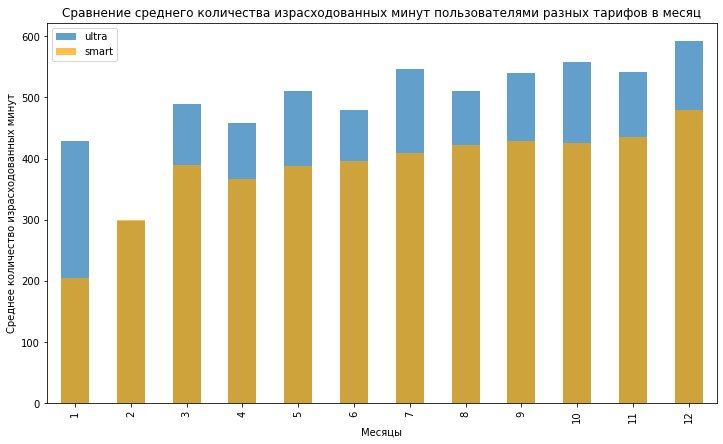

In [26]:
#заберем из сводной таблицы информацию о среднем количестве израсходованных минут в месяц по разным тарифам и построим гистрограмму

calls_smart = client_tariff.xs('duration_calls', level=0, axis=1)['mean'].xs('smart', level=0)
calls_ultra = client_tariff.xs('duration_calls', level=0, axis=1)['mean'].xs('ultra', level=0)

calls_ultra.plot(kind='bar', alpha=0.7, label='ultra')
calls_smart.plot(kind='bar', alpha=0.7, label='smart', figsize=(12,7), color='orange')


plt.legend(loc='upper left')
plt.title('Сравнение среднего количества израсходованных минут пользователями разных тарифов в месяц')
plt.xlabel('Месяцы')
plt.ylabel('Среднее количество израсходованных минут')
plt.show()

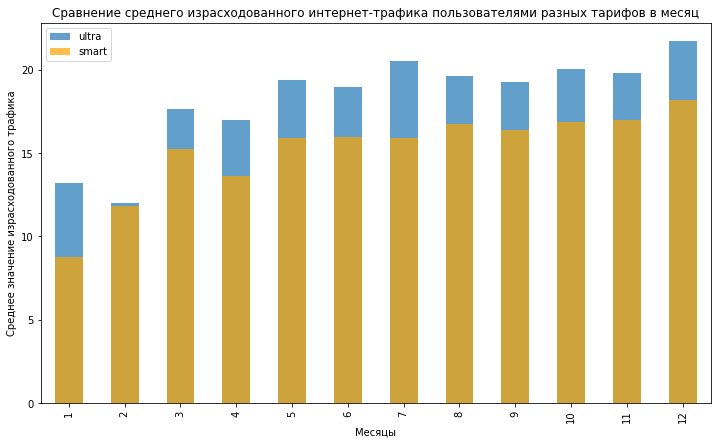

In [27]:
#заберем из сводной таблицы информацию о среднем значении израсходованного интернет-трафика в месяц по разным тарифам и построим гистрограмму

gb_used_smart = client_tariff.xs('gb_used', level=0, axis=1)['mean'].xs('smart', level=0)
gb_used_ultra = client_tariff.xs('gb_used', level=0, axis=1)['mean'].xs('ultra', level=0)

gb_used_ultra.plot(kind='bar', alpha=0.7, label='ultra')
gb_used_smart.plot(kind='bar', alpha=0.7, label='smart', figsize=(12,7), color='orange')

plt.legend(loc='upper left')
plt.title('Сравнение среднего израсходованного интернет-трафика пользователями разных тарифов в месяц')
plt.xlabel('Месяцы')
plt.ylabel('Среднее значение израсходованного трафика')
plt.show()

In [28]:
#построим сводную таблицу для определения основных статистических параметров в целом по тарифам

client_tariff_hab = all_options_month.pivot_table(index='tariff', values=['duration_calls', 'count_messages', 'gb_used'], aggfunc={'duration_calls':['mean', 'var', 'std'], 'count_messages':['mean', 'var', 'std'], 'gb_used':['mean', 'var', 'std']})

client_tariff_hab

count_messages                duration_calls                   gb_used  \
                 mean   std      var           mean    std        var    mean   
tariff                                                                          
smart           33.38 28.23   796.81         417.93 190.31  36,219.32   16.33   
ultra           49.36 47.80 2,285.27         526.62 317.61 100,873.63   19.49   

                   
        std   var  
tariff             
smart  5.75 33.03  
ultra  9.85 97.09

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
<b>Для начала опишем поведение пользователей тарифа 'Smart':</b>
<br>
    
Пользователи в среднем в месяц отправляют около 34 сообщений, тратят около 418 минут на разговоры и 16.33 ГБ интернет-трафика. Мы можем наблюдать достаточно большое стандартное отклонение по количеству отправленных сообщений, данный факт говорит о том, что в выборке есть как те, кто активно отправляет сообщения, так и те, кто вообще ими не пользуется. Также интересен тот факт, что пользователи данного тарифа в среднем не укладываются в выделенный лимит интернет-трафика - 15 ГБ, тратя 16.33 ГБ, при этом количества минут и сообщений достаточно.
    
<br>
<b>Далее опишем поведение пользователей тарифа 'Ultra':</b>   
<br>
    
Пользователи в среднем в месяц отправляют около 50 сообщений, тратят около 527 минут на разговоры и 19.5 ГБ интернет-трафика.
По пользователям данного тарифа мы тоже можем наблюдать достаточно большое стандартное отклонение, что говорит о разнородности выборки по использованию смс-сообщений. Что еще интересно, так это то, что клиенты данного тарифа не расходуют даже пятой части отведенного лимита минут в месяц, при этом пользователи тарифа 'Smart' используют практически весь лимит минут по своему тарифу. В целом можно сказать, что в среднем пользователи тарифа 'Ultra' укладываются в месячные лимиты минут, сообщений и интернет-трафика.         
<br>
<b>Проведем помесячный анализ использования пользователями различных услгу по тарифам.</b>
<br>
Начнем с смс-сообщений: пользователи тарифа 'Smart' практически каждый месяц в среднем отправляют одинаковое количество сообщений, тогда как у пользователей тарифа 'Ultra' наблюдается рост отправляемых сообщений с февраля по декабрь.
<br>
Что касается среднего количества израсходованных минут в месяц, то у пользователей тарифа 'Ultra' нельзя выделить какую-либо динамику, тогда как у пользователей тарифа 'Smart' наблюдается ежемесячный рост расходуемых минут с апреля по декабрь.
<br>
По количеству израсходованного интернет-трафика нельзя выделить какую-либо динамику у пользователей обоих тарифов, есть как рост, так и снижение используемого трафика по месяцам.        
</div>

### Построение гистограмм частот

In [29]:
#теперь подготовим данные для построения гистограмм частот
duration_calls_smart = all_options_month.query('tariff == "smart"')['duration_calls']
count_messages_smart = all_options_month.query('tariff == "smart"')['count_messages']
internet_smart = all_options_month.query('tariff == "smart"')['gb_used']

duration_calls_ultra = all_options_month.query('tariff == "ultra"')['duration_calls']
count_messages_ultra = all_options_month.query('tariff == "ultra"')['count_messages']
internet_ultra = all_options_month.query('tariff == "ultra"')['gb_used']

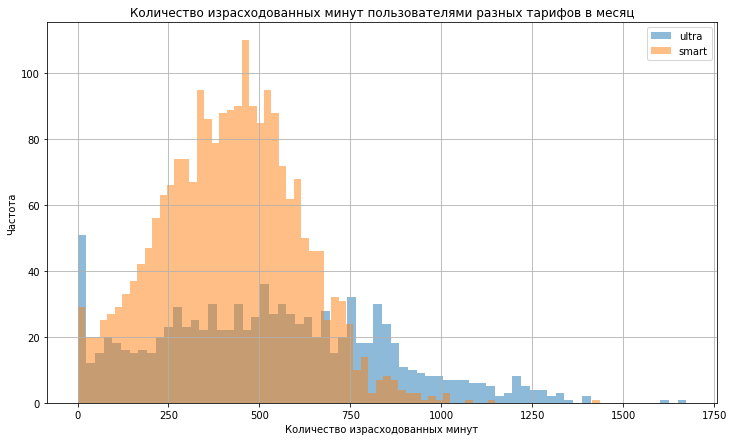

In [30]:
# строим гистограмму распределения количества минут
plt.figure(figsize=(12, 7))

duration_calls_ultra.hist(bins=70, alpha=0.5, label='ultra')
duration_calls_smart.hist(bins=70, alpha=0.5, label='smart')

plt.legend(loc='upper right')
plt.title('Количество израсходованных минут пользователями разных тарифов в месяц')
plt.xlabel('Количество израсходованных минут')
plt.ylabel('Частота')
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
По приведенной выше гистограмме можно говорить о том, что наши выборки имеют близкое к нормальному распределение по количеству израсходованных минут. Для тарифа 'smart' это выражено более ярко, у тарифа 'ultra' - менее.
</div>

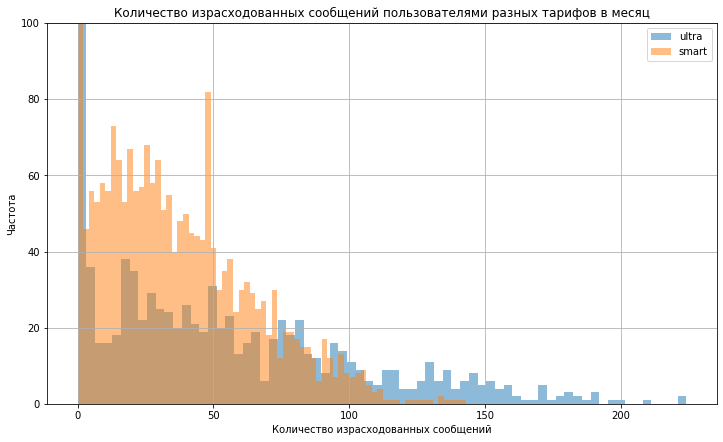

In [31]:
# строим гистограмму распределения израсходованных сообщений
plt.figure(figsize=(12, 7))

count_messages_ultra.hist(bins=70, alpha=0.5, label='ultra')
count_messages_smart.hist(bins=70, alpha=0.5, label='smart')

plt.legend(loc='upper right')
plt.title('Количество израсходованных сообщений пользователями разных тарифов в месяц')
plt.xlabel('Количество израсходованных сообщений')
plt.ylabel('Частота')
plt.ylim(0,100)
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
На приведенной выше гистограмме выделяется столбец со значениями в ноль сообщений, это те пользователи, которые не отправляли сообщения. Тут мы уже наблюдаем распределение близкое к распределению Пуассона. 
</div>

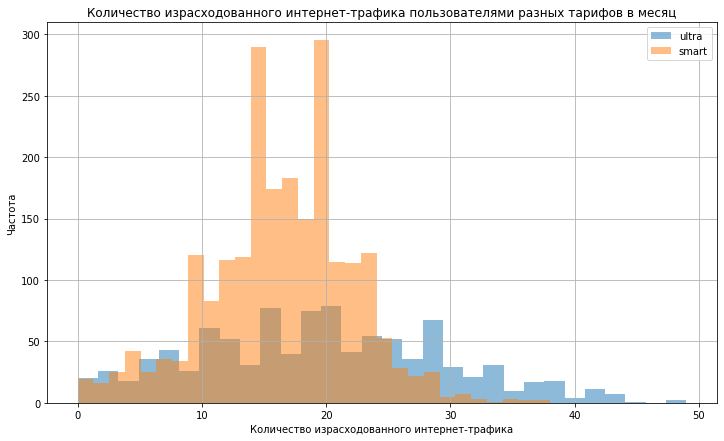

In [32]:
# строим гистограмму распределения израсходованного интернет-трафика
plt.figure(figsize=(12, 7))

internet_ultra.hist(bins=30, alpha=0.5, label='ultra')
internet_smart.hist(bins=30, alpha=0.5, label='smart')

plt.legend(loc='upper right')
plt.title('Количество израсходованного интернет-трафика пользователями разных тарифов в месяц')
plt.xlabel('Количество израсходованного интернет-трафика')
plt.ylabel('Частота')
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
На гистограмме по распределению израсходованного интернет-трафика мы тоже видим распределение близкое к нормальному распределению.
</div>

## Проверка гипотез

### Анализ выручки

In [33]:
#построим сводную таблицу для определения основных статистических параметров выручки по месяцам

client_revenue = all_options_month.pivot_table(index=['tariff', 'month'], values='revenue', aggfunc={'revenue':['mean', 'var', 'std']})

client_revenue

mean      std          var
tariff month                               
smart  1       721.32   438.77   192,516.16
       2       827.60   540.70   292,358.66
       3     1,164.62   698.03   487,239.03
       4       963.09   562.06   315,916.55
       5     1,197.51   722.97   522,690.18
       6     1,204.02   745.74   556,125.17
       7     1,223.95   738.47   545,338.25
       8     1,320.60   792.22   627,619.37
       9     1,249.95   732.59   536,688.49
       10    1,364.85   842.77   710,266.39
       11    1,343.05   795.73   633,185.80
       12    1,578.53 1,034.74 1,070,678.49
ultra  1     1,950.00     0.00         0.00
       2     1,975.00    84.70     7,173.91
       3     2,014.86   207.79    43,175.68
       4     2,001.82   196.25    38,515.15
       5     2,059.70   403.32   162,669.61
       6     2,039.29   315.95    99,823.58
       7     2,118.13   446.00   198,917.58
       8     2,083.18   399.70   159,761.51
       9     2,024.35   246.85    60,937.07
       10    2,065.85   386.89   149,685.13
       11    2,092.16   409.38   167,588.51
       12    2,138.85   482.30   232,610.26

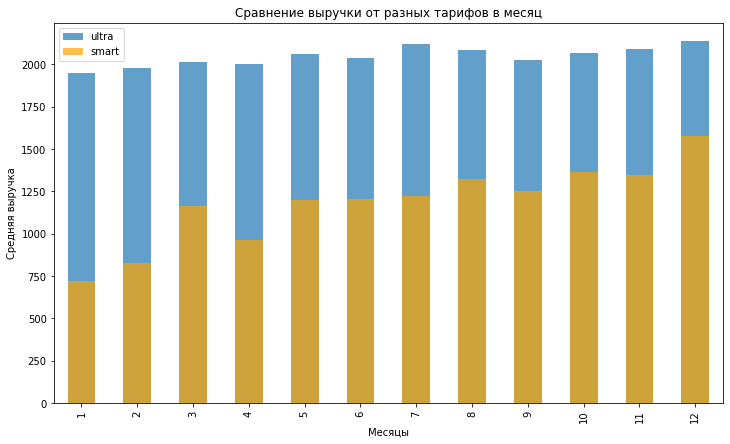

In [34]:
#построим гистрограмму для сравнения средней выручки от разных тарифов в месяц

revenue_smart = client_revenue['mean'].xs('smart', level=0)
revenue_ultra = client_revenue['mean'].xs('ultra', level=0)

revenue_ultra.plot(kind='bar', alpha=0.7, label='ultra')
revenue_smart.plot(kind='bar', alpha=0.7, label='smart', figsize=(12,7), color='orange')

plt.legend(loc='upper left')
plt.title('Сравнение выручки от разных тарифов в месяц')
plt.xlabel('Месяцы')
plt.ylabel('Средняя выручка')
plt.show()

In [35]:
# также узнаем средние статистические параметры для выручки от использования разных тарифов

client_revenue_mean = all_options_month.pivot_table(index='tariff', values='revenue', aggfunc={'revenue':['mean', 'var', 'std']})

client_revenue_mean

,mean,std,var
tariff,,,
smart,"1,289.97",818.40,"669,785.71"
ultra,"2,070.15",376.19,"141,516.75"


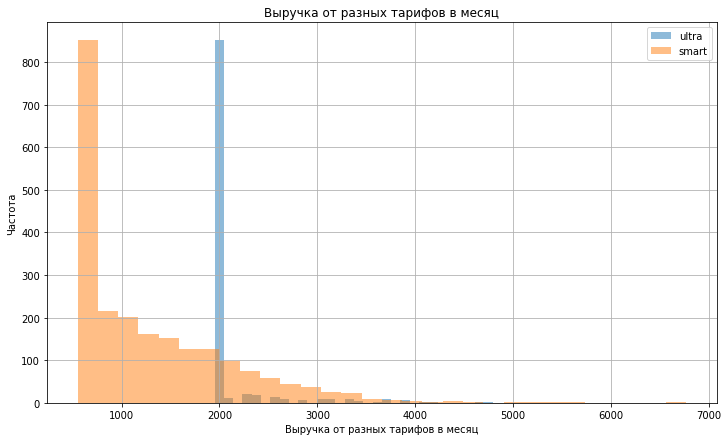

In [36]:
# построим гистограмму распределения выручки по месяцам

revenue_dens_smart = all_options_month.query('tariff == "smart"')['revenue']
revenue_dens_ultra = all_options_month.query('tariff == "ultra"')['revenue']

plt.figure(figsize=(12, 7))

revenue_dens_ultra.hist(bins=30, alpha=0.5, label='ultra')
revenue_dens_smart.hist(bins=30, alpha=0.5, label='smart')

plt.legend(loc='upper right')
plt.title('Выручка от разных тарифов в месяц')
plt.xlabel('Выручка от разных тарифов в месяц')
plt.ylabel('Частота')
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Как мы можем заметить по гистограмме распределения пользователи тарифа 'smart' чаще переплачивают за использование услуг оператора. 
</div>

### Проверка гипотез

<b>1 гипотеза:</b>
средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются


<b>Сформулируем нулевую гипотезу:</b>
<br>
среднее месячной выручки пользователей тарифов «Ультра» и «Смарт» равны.

Далее сформулируем противоположную по смыслу нулевой гипотезе - <b>альтернативную</b>:
<br>
среднее месячной выручки пользователей тарифов «Ультра» и «Смарт» различаются.
<br>
Пороговое значение alpha примем 0.05.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам применим метод 'ttest_ind'. Значение параметра equal_var поставим False, т.к. дисперсия между тарифами различна(таблица п.4.1).

In [37]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    revenue_dens_smart, 
    revenue_dens_ultra, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
В ходе проверки гипотез мы отвергли нулевую гипотезу и можем говорить о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
</div>

<b>2 гипотеза:</b>
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

<b>Сформулируем нулевую гипотезу:</b>
<br>
средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

Далее сформулируем противоположную по смыслу нулевой гипотезе - <b>альтернативную</b>:
<br>
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
<br>
Пороговое значение alpha примем 0.05.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам применим метод 'ttest_ind'. Значение параметра equal_var поставим False, т.к. дисперсия между тарифами различна.

In [38]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    all_options_month.query('city == "Москва"')['revenue'], 
    all_options_month.query('city != "Москва"')['revenue'], equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
В ходе проверки гипотез не смогли отвергнуть нулевую гипотезу и можем говорить о том, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.
</div>

## Выводы

- Нами были изучены и подготовлены данные для статистического анализа поведения пользователей раличных тарифов
- Был проведен анализ поведения пользователей
- Были проведены проверки гипотез: гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются подтвердилась, и не подтвердилась гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
- Как мы выяснили из исследования, пользователи тарифа «Смарт» чаще переплачивают за использование услуг по своему тарифу, однако, тариф «Ультра» приносит больше выручки оператору и именно на него коммерческий департамент должен направить свои средства.
- Также интересно то, что пользователи тарифа "Ультра" тратят в среднем каждый месяц одинаково, редко превышая лимит по тарифу, а вот у пользователей тарифа "Смарт" есть интересная динамика: с начала года и до его конца пользователи в среднем переплачивают все больше и больше, за исключением некоторых месяцев, но в целом имеется положительная динамика по переплате за услуги оператора.

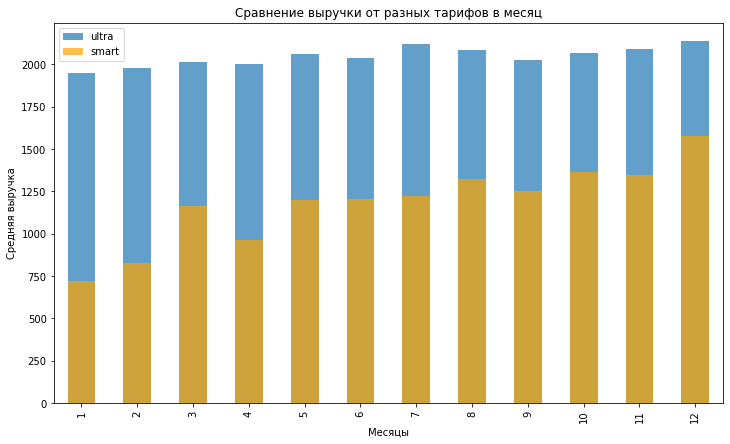

In [39]:
#построим гистрограмму для сравнения средней выручки от разных тарифов в месяц

revenue_smart = client_revenue['mean'].xs('smart', level=0)
revenue_ultra = client_revenue['mean'].xs('ultra', level=0)

revenue_ultra.plot(kind='bar', alpha=0.7, label='ultra')
revenue_smart.plot(kind='bar', alpha=0.7, label='smart', figsize=(12,7), color='orange')

plt.legend(loc='upper left')
plt.title('Сравнение выручки от разных тарифов в месяц')
plt.xlabel('Месяцы')
plt.ylabel('Средняя выручка')
plt.show()